In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")
if (!require("clevr")) install.packages("clevr")
library ("clevr")

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: clevr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘clevr’”
also installing the dependencies ‘Rcpp’, ‘BH’





The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpEHkWWY/downloaded_packages


In [2]:
# Reading the csv files
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
        sectors.names = c(sectors.names, toString(sector))
    }
}

In [8]:
# Printing the sector details
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

QUESTION 1: What are upper and lower bounds on $ρ_{ij}$? Provide a justification for using log- normalized return ($r_i(t)$) instead of regular return ($q_i(t)$).

$\rho_{ij}=\frac{\langle r_i(t) r_j(t) \rangle - \langle r_i(t) \rangle \langle r_j(t) \rangle}{\sqrt{(\langle r_i(t)^2 \rangle - \langle r_i(t) \rangle^2)(\langle r_j(t)^2 \rangle - \langle r_j(t) \rangle^2)}}$  
Let $\langle x(t) \rangle = \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} x(t)$.  
Then  
$\rho_{ij}=\frac{\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)r_j(t)- \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t) \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)}{\sqrt{\big( \frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)^2-\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_i(t)\big)\big(\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)^2-\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)\frac{1}{t_{max}}\sum\limits_{t=1}^{t_{max}} r_j(t)\big)}}$  
  
Simplify the notation:  
  
$\rho_{ij}=\frac{\frac{1}{t}\sum r_ir_j- \frac{1}{t}\sum r_i \frac{1}{t}\sum r_j}{\sqrt{\big( \frac{1}{t}\sum r_i^2-\frac{1}{t}\sum r_i\frac{1}{t}\sum r_i\big)\big(\frac{1}{t}\sum r_j^2-\frac{1}{t}\sum r_j\frac{1}{t}\sum r_j\big)}}$
$=\frac{\frac{1}{t}\sum r_ir_j- \big(\frac{1}{t}\big)^2\sum r_i \sum r_j}{\sqrt{\big( \frac{1}{t}\sum r_i^2-\big(\frac{1}{t}\big)^2\sum r_i\sum r_i\big)\big(\frac{1}{t}\sum r_j^2-\big(\frac{1}{t}\big)^2\sum r_j\sum r_j\big)}}$  
  
Case 1, $r_i = r_j$:  
$\rho_{ij}=\frac{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}{\sqrt{\big( \frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)\big(\frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)}}$ 
$=\frac{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}=1$  
  
Case 2, $r_i = -r_j$:  
$\rho_{ij}=\frac{\frac{1}{t}\big(-\sum r^2\big)- \big(\frac{1}{t}\big)^2\big(-\sum r \sum r\big)}{\sqrt{\big( \frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)\big(\frac{1}{t}\sum r^2-\big(\frac{1}{t}\big)^2\sum r\sum r\big)}}$
$=\frac{-\big(\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r\big)}{\frac{1}{t}\sum r^2- \big(\frac{1}{t}\big)^2\sum r \sum r}=-1$  
  
Thus, the lower bound is -1 and the upper bound is 1.  
  
asdf

One reason why $r_i(t)$ may be used instead of $q_i(t)$ could be that if $p_i(t)$ were to remain constant throughout the time interval, then $q_i(t) = \langle q_i(t)^2\rangle=\langle q_i(t)\rangle^2=0$. This would cause one of the factors in the denominator of $\rho_{ij}$ to be 0 which would make $\rho_{ij}$ undefined.

QUESTION 2: Plot a histogram showing the un-normalized distribution of edge weights.

In [3]:
# Processing the files with p,q,r computations for the daily stock market data
allcomp = read.csv("finance_data/Name_sector.csv", header=TRUE, stringsAsFactors=FALSE)
filenames <- list.files("finance_data/data", pattern="*.csv")
filenames = paste("finance_data/data", filenames, sep="/")

L=c()
k=1
mat = matrix(0,length(filenames)-11,764)
for(j in c(1:length(filenames))){
    df = read.csv(filenames[j],header=TRUE, stringsAsFactors=FALSE)
    L[j] = dim(df)[1]
    if(L[j]==765){
        p = df[,5] 
        q = c()
        r = c()
        for(i in c(2:length(p))){
            q[i-1] = (p[i]-p[i-1])/p[i-1]
        }
        r = log(1+q)
        mat[k,] = r
        k = k+1
    }
}

allcomp["length"] = L
ind = which(L!=765)

allcomp <- allcomp[-ind,]

In [4]:
# Helper function for correlation computation
cal_cor <- function(conn, mat, allcomp){
    numCom = dim(mat)[1]
    cat("from","\t","to","\t","wt",file=conn)
    for(i in c(1:(numCom-1))){
        for(j in c((i+1):numCom)){
            ri = mean(mat[i,])
            rj = mean(mat[j,])
            mult = mean(mat[i,]*mat[j,])
            num = mult-(ri*rj)
            ri2 = mat[i,]^2
            rj2 = mat[j,]^2
            den = sqrt((mean(ri2)-(ri^2))*(mean(rj2)-(rj^2)))
            pij = num/den
            wij = sqrt(2*(1-pij))
            #val = 
            cat('\n',allcomp[i,1],'\t',allcomp[j,1],'\t',wij,file=conn)
        }
    }
}

In [5]:
# Creating the correlation graph
conn <- file("edgelist.txt", "w")
cal_cor(conn, mat, allcomp)
close(conn)
elist <-read.delim("edgelist.txt",header=TRUE)
g <- graph.data.frame(elist, directed = FALSE)
E(g)$weight <- elist[,"wt"]

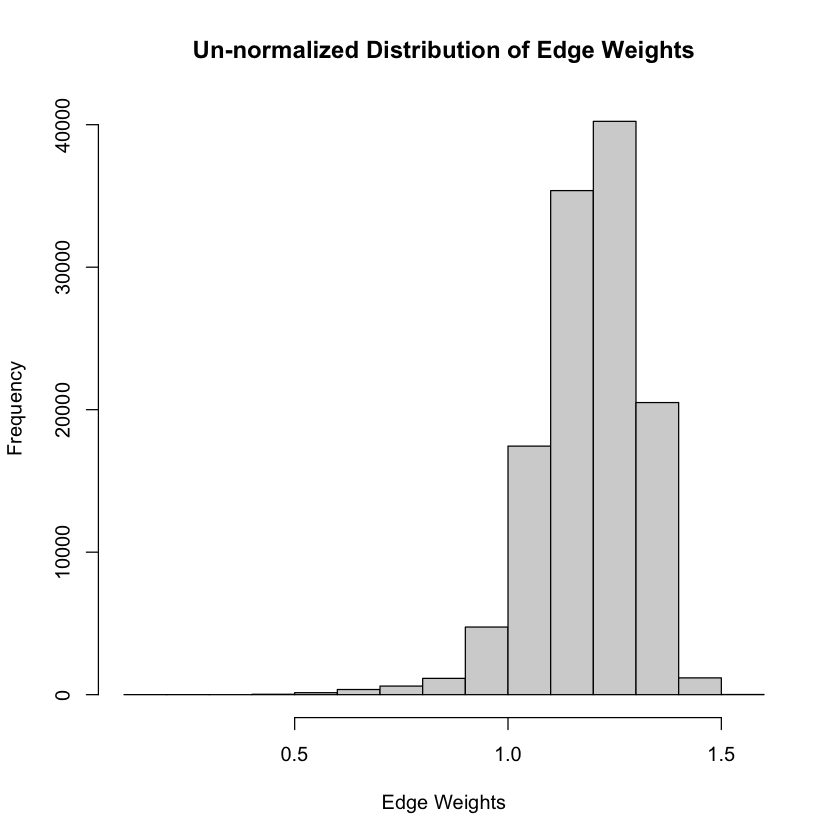

In [6]:
# Plotting the un-normalized distribution of edge weights
hist(elist[,"wt"],main="Un-normalized Distribution of Edge Weights",xlab="Edge Weights",ylab="Frequency")

QUESTION 3: Extract the MST of the correlation graph. Each stock can be categorized into a sector, which can be found in Name sector.csv file. Plot the MST and color-code the nodes based on sectors. Do you see any pattern in the MST? The structures that you find in MST are called Vine clusters. Provide a detailed explanation about the pattern you observe.

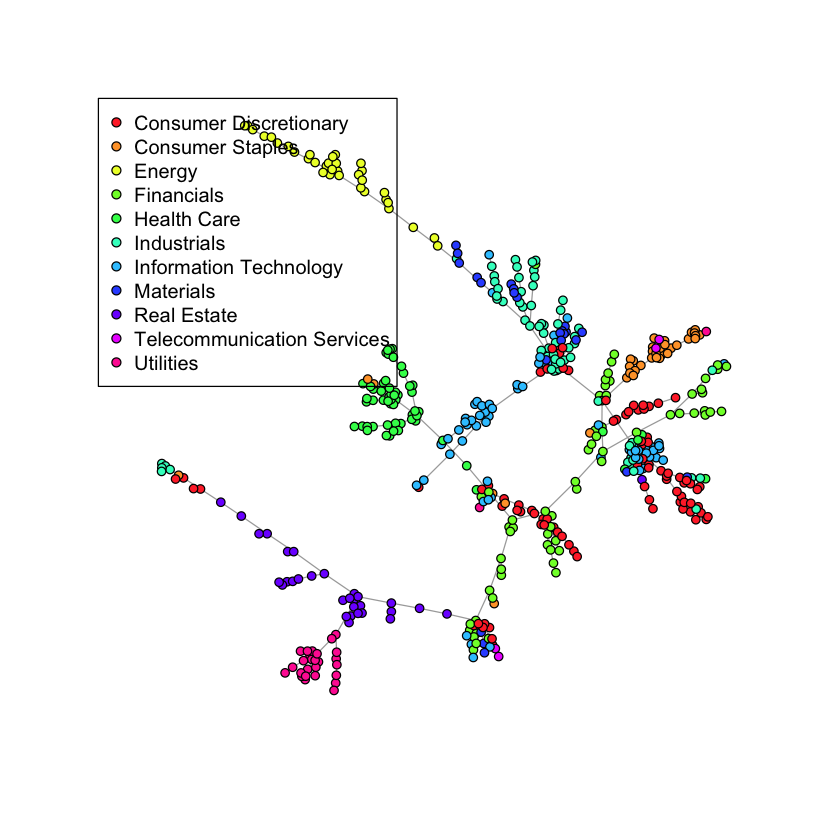

In [9]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_g <- mst(g, algorithm = 'prim')
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

A pattern that can be seen is that the nodes with the same sector coloring tend to be grouped together in the vine clusters of the tree.

QUESTION 4: Run a community detection algorithm (for example walktrap) on the MST ob- tained above. Plot the communities formed. Compute the homogeneity and completeness of the clustering. (you can use the ’clevr’ library in r to compute homogeneity and completeness).

[1] 33

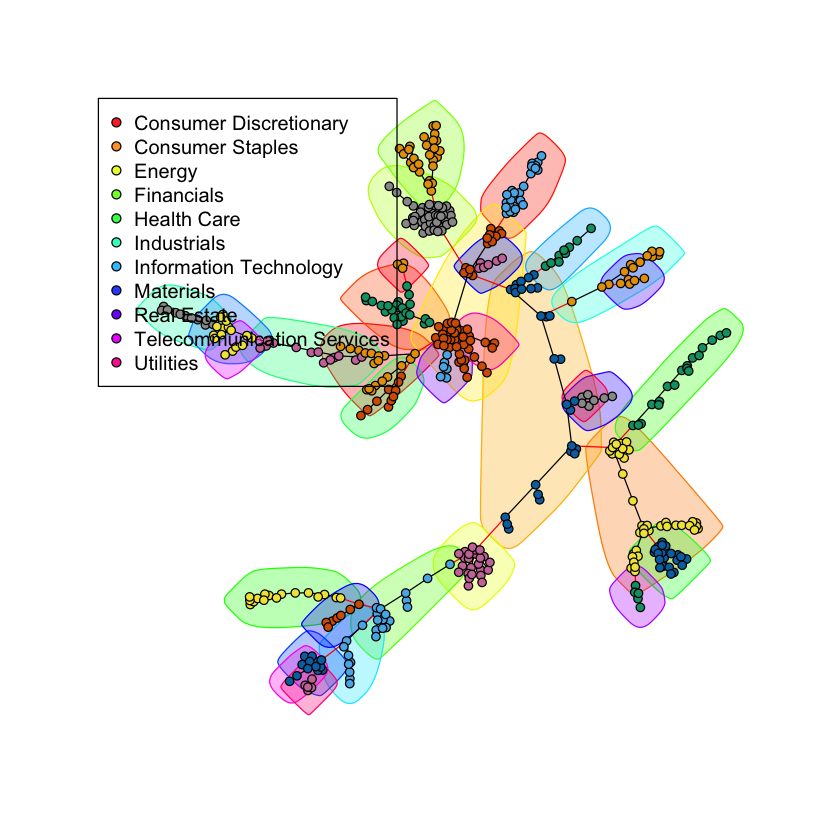

In [11]:
# Clustering of correlation graph
wc_daily <- walktrap.community(mst_g, weights= E(mst_g)$weights, modularity = TRUE) 
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [12]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)
pred <- c(wc_daily$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.6826446

[1] 0.4792845

QUESTION 5: Report the value of α for the two cases and provide an interpretation for
the difference.

In [103]:
card_V = length(V(mst_g))
sum1 = 0
sum2 = 0
for(v in V(mst_g)){
    card_N = length(neighbors(mst_g,v))
    v_sect = sectors.index[v]
    card_Q = 0
    for(n in neighbors(mst_g, v)){
        if(sectors.index[n] == v_sect){
            card_Q = card_Q + 1
        }
    }
    card_S = length(sectors.index[sectors.index==v_sect])
    p1 = card_Q / card_N
    p2 = card_S / card_V
    sum1 = sum1 + p1
    sum2 = sum2 + p2
}
alpha1 = sum1 / card_V
alpha2 = sum2 / card_V
print("Alpha with first definition of P:")
print(alpha1)
print("Alpha with second definition of P:")
print(alpha2)

[1] "Alpha with first definition of P:"
[1] 0.8289301
[1] "Alpha with second definition of P:"
[1] 0.1141881


For the first case, P is the fraction of neighbors that are in the same sector out of all the neighbors. For the second case, P is the fraction of all nodes that are in the same sector out of all nodes. The second case is a much smaller fraction with the largest number of nodes in a given sector being 84 which is less than a fifth of all nodes. Since the nodes are well-clustered based on sector, the first case has a relatively high value.

QUESTION 6: Repeat questions 2,3,4,5 on the WEEKLY data.

In [105]:
# Processing the files with p,q,r computations for the weekly stock market data
df["Day"] <-weekdays(as.Date(df[,1]))
L=c()
k=1
matw = matrix(0,length(filenames)-6,142)
for(j in c(1:length(filenames))){
    df = read.csv(filenames[j],header=TRUE, stringsAsFactors=FALSE)
    df["Day"]<-weekdays(as.Date(df[,1])) 
    df <- subset(df, Day=='Monday')
    L[j] = dim(df)[1]
    if(L[j]==143){
        p = df[,5] 
        q = c()
        r = c()
        for(i in c(2:length(p))){
            q[i-1] = (p[i]-p[i-1])/p[i-1]
        }
        r = log(1+q)
        matw[k,] = r
        k = k+1
    }
}

allcompw = read.csv("finance_data/Name_sector.csv", header=TRUE, stringsAsFactors=FALSE)
allcompw["length"] = L
ind = which(L!=143)
allcompw <- allcompw[-ind,]

In [106]:
# Creating the correlation graph
conn <- file("edgelist-weekly.txt", "w")
cal_cor(conn, matw, allcompw)
close(conn)
elistw <-read.delim("edgelist-weekly.txt",header=TRUE)
gw <- graph.data.frame(elistw, directed = FALSE)
E(gw)$weight <- elistw[,"wt"]

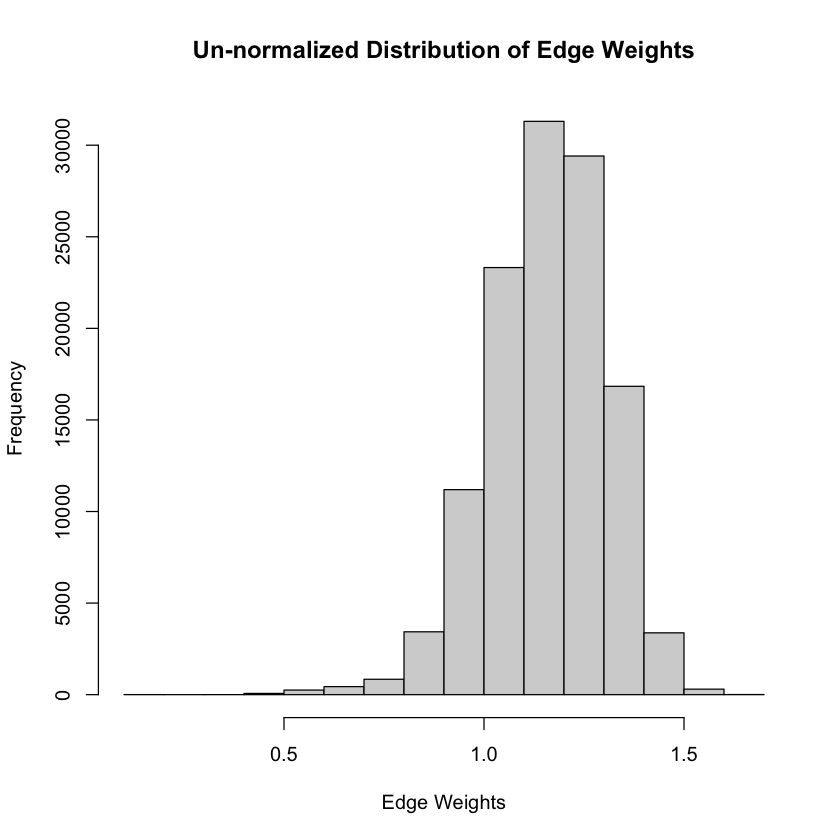

In [107]:
# Plotting the un-normalized distribution of edge weights
hist(elistw[,"wt"],main="Un-normalized Distribution of Edge Weights",xlab="Edge Weights",ylab="Frequency")

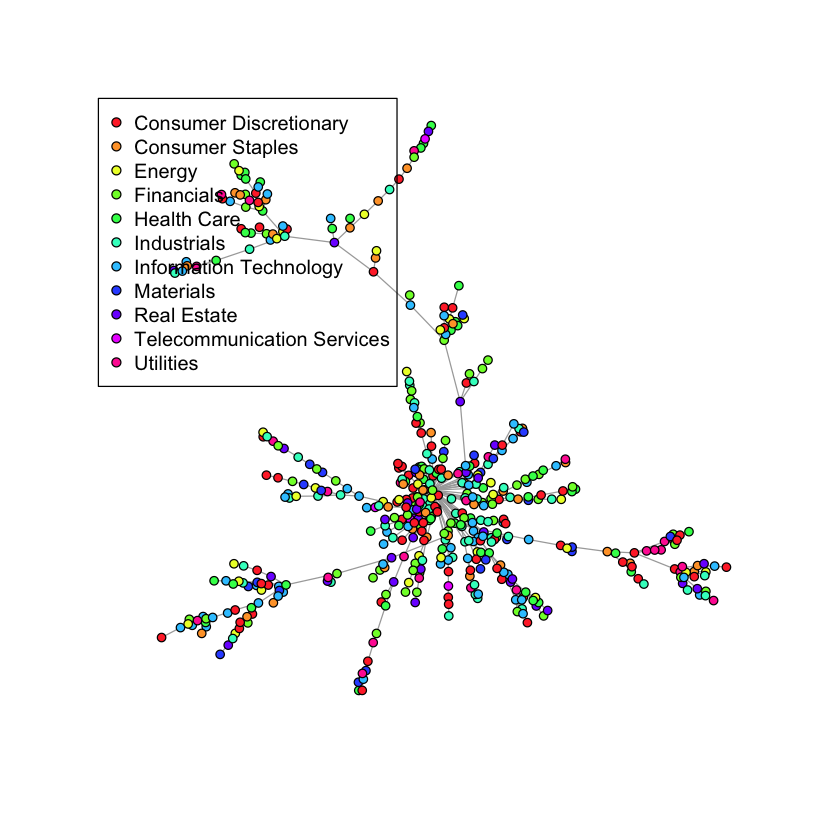

In [108]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_gw <- mst(gw)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_gw, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 55

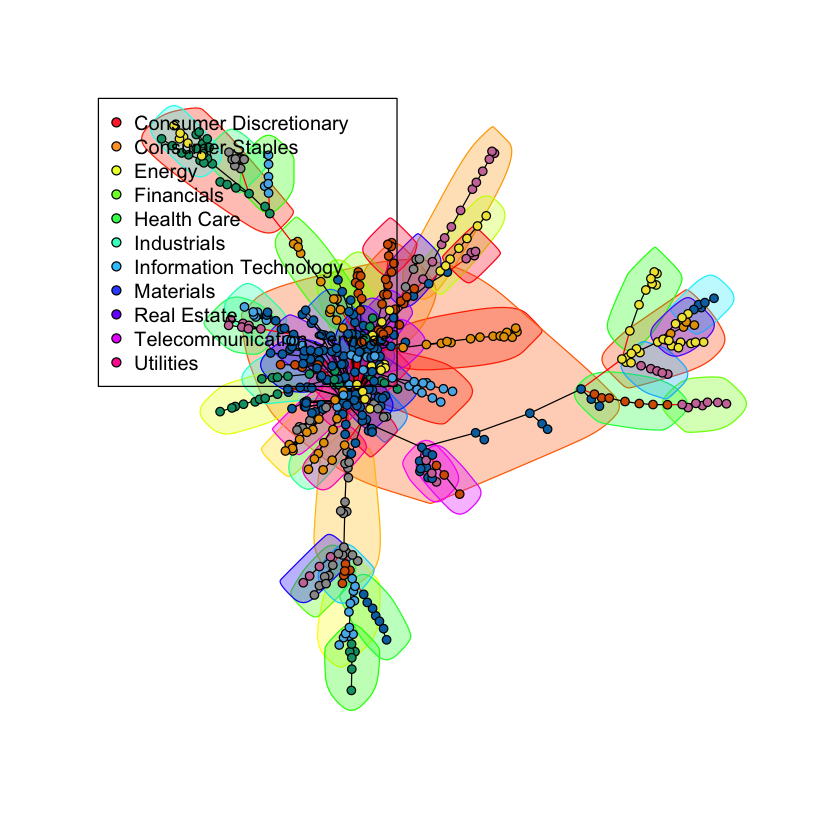

In [109]:
# Clustering of correlation graph
wc_weekly <- walktrap.community(mst_gw, weights= E(mst_gw)$weights, modularity = TRUE) 
length(wc_weekly)
plot(wc_weekly, mst_gw, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [110]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)[1:493]
pred <- c(wc_weekly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.2530779

[1] 0.1656086

In [112]:
card_V = length(V(mst_gw))
sum1 = 0
sum2 = 0
for(v in V(mst_gw)){
    card_N = length(neighbors(mst_gw,v))
    v_sect = sectors.index[v]
    card_Q = 0
    for(n in neighbors(mst_gw, v)){
        if(sectors.index[n] == v_sect){
            card_Q = card_Q + 1
        }
    }
    card_S = length(sectors.index[sectors.index==v_sect])
    p1 = card_Q / card_N
    p2 = card_S / card_V
    sum1 = sum1 + p1
    sum2 = sum2 + p2
}
alpha1 = sum1 / card_V
alpha2 = sum2 / card_V
print("Alpha with first definition of P:")
print(alpha1)
print("Alpha with second definition of P:")
print(alpha2)

[1] "Alpha with first definition of P:"
[1] 0.1287032
[1] "Alpha with second definition of P:"
[1] 0.1144049


QUESTION 7: Repeat questions 2,3,4,5 on the MONTHLY data.

In [113]:
# Processing the files with p,q,r computations for the monthly stock market data
df["Month"]<-months(as.Date(df[,1]))
df["Month_Num"]<-substr(as.Date(df[,1]), 9, 10)

head(df)
L=c()
k=1
matm = matrix(0,length(filenames)-13,142)
for(j in c(1:length(filenames))){
    df = read.csv(filenames[j],header=TRUE, stringsAsFactors=FALSE)
    df["Month"]<-months(as.Date(df[,1])) 
    df["Month_Num"]<-substr(as.Date(df[,1]), 9, 10)
    df <- subset(df, Month_Num=='15')
    L[j] = dim(df)[1]
    if(L[j]==143){
        p = df[,5] 
        q = c()
        r = c()
        for(i in c(2:length(p))){
            q[i-1] = (p[i]-p[i-1])/p[i-1]
        }
        r = log(1+q)
        matm[k,] = r
        k = k+1
    }
}

allcompm = read.csv("finance_data/Name_sector.csv", header=TRUE, stringsAsFactors=FALSE)
allcompm["length"] = L
ind = which(L!=143)
allcompw <- allcompw[-ind,]

,Date,Open,High,Low,Close,Volume,Adj.Close,Day,Month,Month_Num
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
3,2014-05-05,30.42,30.63,30.11,30.53,4425200,29.81641,Monday,May,05
8,2014-05-12,30.58,30.86,30.55,30.81,1971000,30.08987,Monday,May,12
13,2014-05-19,30.60,30.63,30.28,30.46,3671100,29.74805,Monday,May,19
22,2014-06-02,30.80,30.96,30.65,30.92,3561300,30.19730,Monday,June,02
27,2014-06-09,31.78,32.01,31.65,32.01,3189400,31.26182,Monday,June,09
32,2014-06-16,32.08,32.21,31.99,32.13,2197200,31.37902,Monday,June,16


In [114]:
# Creating the correlation graph
conn <- file("edgelist-monthly.txt", "w")
cal_cor(conn,matm,allcompm)
close(conn)
elistm <-read.delim("edgelist-monthly.txt",header=TRUE)
gm <- graph.data.frame(elistm, directed = FALSE)
E(gm)$weight <- elistm[,"wt"]

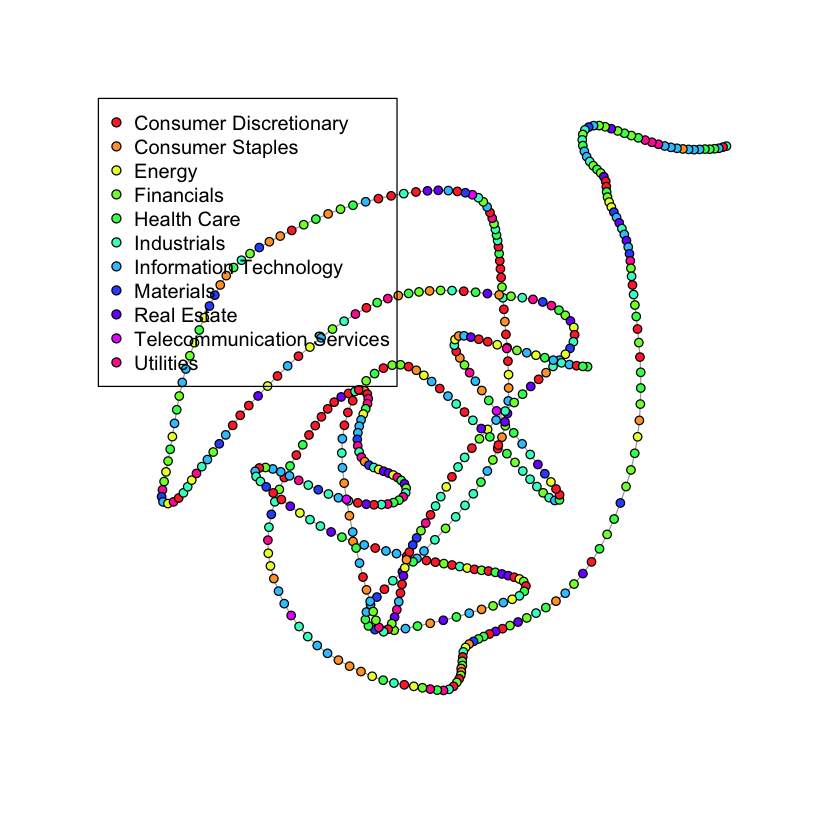

In [119]:
# Extracting and plotting the minimum spanning tree of the correlation graph
mst_gm <- mst(gm)
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_gm, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 24

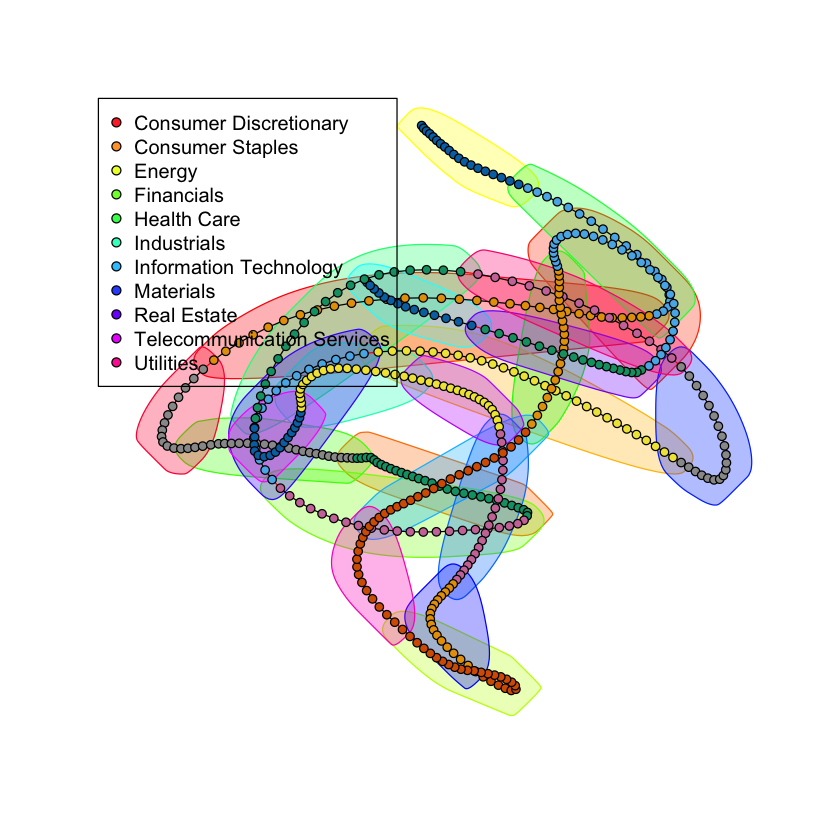

In [120]:
# Clustering of correlation graph
wc_monthly <- walktrap.community(mst_gm, weights= E(mst_gm)$weights, modularity = TRUE) 
length(wc_monthly)
plot(wc_monthly, mst_gm, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [117]:
# Computing the homogeneity and completeness of the clustering
true<- c(sectors.index)[1:492]

pred <- c(wc_monthly$membership)

homogeneity(true, pred)
completeness(true,pred)

[1] 0.136662

[1] 0.09776118

In [121]:
card_V = length(V(mst_gm))
sum1 = 0
sum2 = 0
for(v in V(mst_gm)){
    card_N = length(neighbors(mst_gm,v))
    v_sect = sectors.index[v]
    card_Q = 0
    for(n in neighbors(mst_gm, v)){
        if(sectors.index[n] == v_sect){
            card_Q = card_Q + 1
        }
    }
    card_S = length(sectors.index[sectors.index==v_sect])
    p1 = card_Q / card_N
    p2 = card_S / card_V
    sum1 = sum1 + p1
    sum2 = sum2 + p2
}
alpha1 = sum1 / card_V
alpha2 = sum2 / card_V
print("Alpha with first definition of P:")
print(alpha1)
print("Alpha with second definition of P:")
print(alpha2)

[1] "Alpha with first definition of P:"
[1] 0.1392276
[1] "Alpha with second definition of P:"
[1] 0.1146102


QUESTION 8: Compare and analyze all the results of daily data vs weekly data vs monthly data. What trends do you find? What changes? What remains similar? Give reason for your observations. Which granularity gives the best results when predicting the sector of an unknown stock and why?

A trend that can be seen is that as the time steps increase, the homogeneity and completeness scores decrease. One notable similarity is that all of the community graphs have all of the sectors grouped together. The other graphs differ in that only for daily are the sectors grouped together. For the other two, the sectors are more dispersed and mixed together. Daily and Weekly have more of a tree structure while Monthly looks more like a linked list. The decrease in scores and mixture of sectors may be accounted for by the decrease in granularity adding noise to the data. The structure for Monthly signifies that Prim's algorithm saw all the weights as being the same which would result in choosing a node at random to append to the last selected node. Next, the alpha values can be compared.  

Interval|P1 Definition $\alpha$|P2 Definition $\alpha$  
--------|----------------------|----------------------  
Daily|0.8289301|0.1141881  
Weekly|0.1287032|0.1144049  
Monthly|0.1392276|0.1146102  

The P1 definition starts off very high with the Daily interval, then dips down at Weekly and then increases very slightly for Monthly. The P2 definition stays fairly consistent throughout all intervals but increases very slightly as the interval increases.